# Deep Finance Researcher with TODO Planner

Build an intelligent agent with task planning capabilities that can search financial documents (RAG) and live market data.

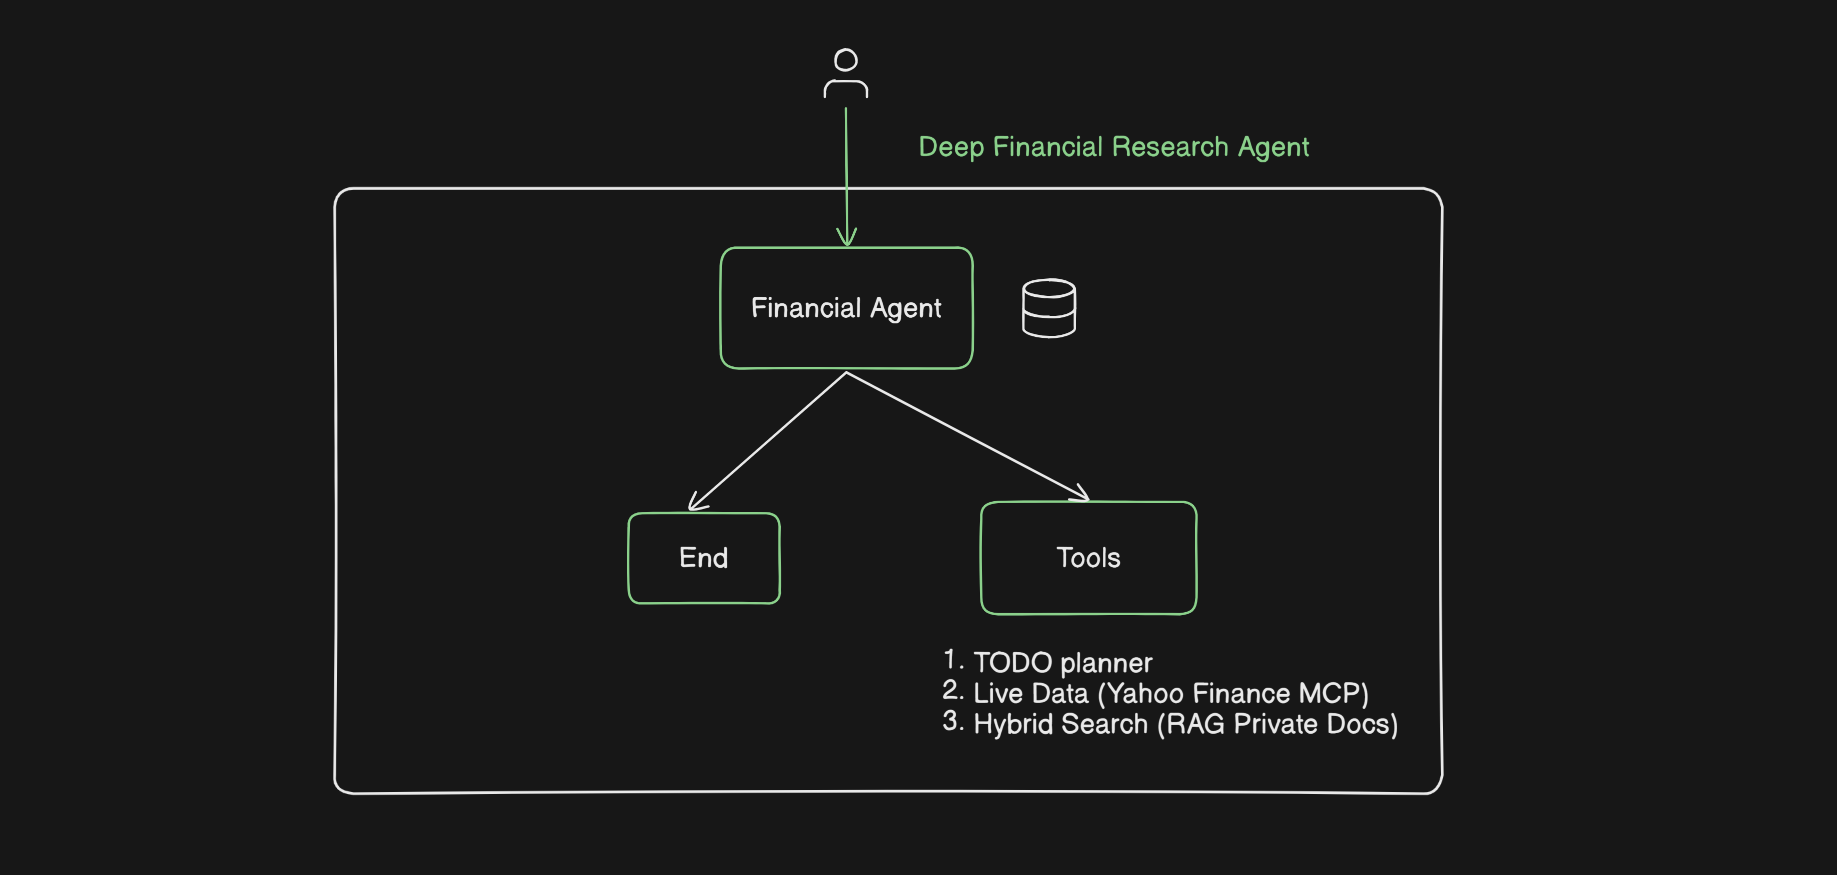

## Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent

from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3

# Langchain built-in middlewares
from langchain.agents.middleware import TodoListMiddleware, SummarizationMiddleware

# centralized rag tools
from scripts.rag_tools import hybrid_search, live_finance_researcher

# centralized prompts and agents utilities
from scripts.prompts import MULTIMODEL_AGENT_PROMPT
from scripts.agent_utils import stream_agent_response

# you can choose model as per your choice
model = ChatGoogleGenerativeAI(model='gemini-3-flash-preview')

## Create Agent with TODO Planner and Summarization

In [4]:
from langgraph.checkpoint.sqlite import SqliteSaver
import sqlite3
from langchain.agents import create_agent

def get_agent():
    conn = sqlite3.connect('data/todo_financial_research_agent.db', check_same_thread=False)
    checkpointer = SqliteSaver(conn=conn)

    agent = create_agent(
        model=model,
        tools=[hybrid_search, live_finance_researcher],
        system_prompt=MULTIMODEL_AGENT_PROMPT,
        checkpointer=checkpointer,
        middleware=[
            SummarizationMiddleware(
                model=model,
                trigger=[('messages', 25)],
                keep=('messages', 10)
            ),
            TodoListMiddleware()
        ]
    )

    return agent

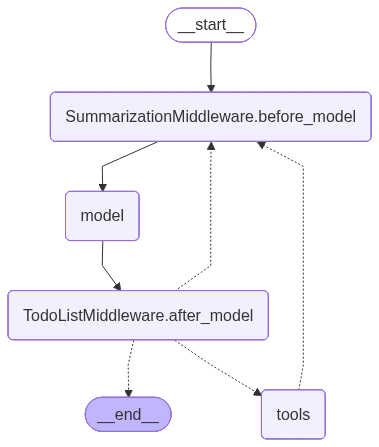

In [5]:
agent = get_agent()

agent

## Examples

In [6]:
# Historical data query
stream_agent_response(agent, "What was Amazon's revenue in Q1 2024?", thread_id="session_1")


  Tool Called: hybrid_search
   Args: {'query': 'Amazon Q1 2024 revenue'}

{"company_name": "amazon", "doc_type": "10-q", "fiscal_year": "2024", "fiscal_quarter": "q1"}
  Tool Result (length: 23975 chars)

Amazon's total revenue (net sales) for the first quarter (Q1) of 2024 was **$143.31 billion**, representing a 13% increase compared to $127.36 billion in Q1 2023.

### Revenue Breakdown by Segment (Q1 2024)
| Segment | Revenue (in millions) | Year-over-Year Growth |
| :--- | :--- | :--- |
| **North America** | $86,341 | 12% |
| **International** | $31,935 | 10% |
| **AWS (Cloud)** | $25,037 | 17% |
| **Consolidated Total** | **$143,313** | **13%** |

### Key Highlights
*   **AWS Growth:** AWS sales grew 17% year-over-year, driven by increased customer usage.
*   **North America:** Growth was primarily attributed to increased unit sales (including third-party sellers), advertising sales, and subscription services.
*   **Operating Income:** Consolidated operating income saw a signific

In [7]:
# Live market data
stream_agent_response(agent, "What is the current stock price of Tesla and latest news?", thread_id="session_2")


  Tool Called: live_finance_researcher
   Args: {'query': 'What is the current stock price of Tesla (TSLA) and the latest news?'}


  Tool Result (length: 777 chars)

Tesla's current stock price and recent news are summarized below:

### **Tesla (TSLA) Current Market Data**
*   **Current Stock Price:** $413.82

### **Latest News Highlights**
*   **Recent Performance:** Tesla's stock experienced a slightly downward trend as of Friday the 13th, marking a week of volatility for the company.
*   **Competitive Landscape:** Rivian, a key competitor in the electric vehicle (EV) market, saw a stock surge following positive analyst upgrades and excitement surrounding its new R2 model, which is positioned to compete directly with Tesla’s Model Y.
*   **Investment Sentiment:** Some market analysts are advising investors to look toward other "millionaire-maker stocks," pointing to concerns over a perceived slowdown in Tesla's growth trajectory.
*   **Regulatory & Incentives:** Changes to EV incen

In [8]:
# Complex query with TODO planning
stream_agent_response(
    agent, 
    "Compare Microsoft's Q2 2024 revenue from SEC filings with its current stock performance",
    thread_id="session_3"
)


  Tool Called: write_todos
   Args: {'todos': [{'status': 'in_progress', 'content': 'Search for Microsoft Q2 2024 revenue in SEC filings (historical data)'}, {'status': 'pending', 'content': 'Get Microsoft current stock performance and price (live data)'}, {'content': 'Compare the revenue data with current stock performance and summarize findings', 'status': 'pending'}]}


  Tool Result (length: 347 chars)


  Tool Called: hybrid_search
   Args: {'query': 'Microsoft Q2 2024 revenue and financial results (fiscal and calendar) from SEC filings'}

{"company_name": "microsoft", "doc_type": "10-q", "fiscal_year": "2024", "fiscal_quarter": "q2"}
  Tool Result (length: 0 chars)


  Tool Called: hybrid_search
   Args: {'query': 'Microsoft revenue for the quarter ended December 31, 2023 and June 30, 2024 from SEC filings'}

{"company_name": "microsoft", "doc_type": "10-q", "fiscal_year": null, "fiscal_quarter": null}
  Tool Result (length: 0 chars)


  Tool Called: hybrid_search
   Args: {'que